In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


Load the data

In [3]:
# Better Life Index data
bli = pd.read_csv("https://raw.githubusercontent.com/jzucchet/scikit-linear-model/master/data/bli_original.csv", delimiter=',')
life_sat_total = bli[bli["INEQUALITY"] == "TOT"]
life_sat_total = life_sat_total.pivot(index="Country", columns="Indicator", values="Value")



In [4]:
life_sat_total.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,1.1,80.0,13.20,72.0,63.6,1.0,33417.0,57462.0,20.0,...,52063.0,94.0,2.3,85.0,2.7,502.0,14.35,91.0,92.0,21.2
Austria,16.0,1.0,85.0,6.78,72.0,80.7,0.4,32544.0,59574.0,21.0,...,48295.0,92.0,1.6,70.0,1.3,492.0,14.55,75.0,93.0,17.1
Belgium,15.0,2.3,75.0,4.31,62.0,70.7,1.0,29968.0,104084.0,21.0,...,49587.0,92.0,2.2,75.0,2.2,503.0,15.77,89.0,84.0,18.2
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14024.0,90.0,0.8,70.0,2.2,395.0,14.45,79.0,72.0,15.9
Canada,7.0,0.2,91.0,3.73,73.0,80.9,1.4,29850.0,85758.0,22.0,...,48403.0,93.0,2.5,88.0,3.0,523.0,14.41,68.0,91.0,16.7


In [5]:
# International Monetary Fund data
imf = pd.read_csv("https://raw.githubusercontent.com/jzucchet/scikit-linear-model/master/data/imf-original.csv", thousands='.', delimiter=';', na_values="n/a", index_col="Country")
imf.rename(columns={"2015": "GDP per capita"}, inplace=True)

In [6]:
imf.head()


,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,Gross domestic product per capita current prices,U.S. dollars,Units,See notes for: Gross domestic product current...,600.0,2013.0
Albania,Gross domestic product per capita current prices,U.S. dollars,Units,See notes for: Gross domestic product current...,3995.0,2010.0
Algeria,Gross domestic product per capita current prices,U.S. dollars,Units,See notes for: Gross domestic product current...,4318.0,2014.0
Angola,Gross domestic product per capita current prices,U.S. dollars,Units,See notes for: Gross domestic product current...,4100.0,2014.0
Antigua and Barbuda,Gross domestic product per capita current prices,U.S. dollars,Units,See notes for: Gross domestic product current...,14414.0,2011.0


In [10]:
# Prepare the data set
country_stats = pd.merge(life_sat_total, imf, on='Country')

In [11]:
# +-+-+-+-+-+-+ +-+-+-+-+-+-+-+-+-+-+
# |L|i|n|e|a|r| |R|e|g|r|e|s|s|i|o|n|
# +-+-+-+-+-+-+ +-+-+-+-+-+-+-+-+-+-+

# X as an independent variable
X = np.c_[country_stats['GDP per capita']]

# y as a dependent variable - predictor
y = np.c_[country_stats['Life satisfaction']]

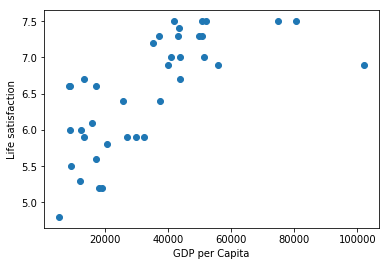

In [12]:
## Visualize the data as scatter model to understand the basic correlation between X and y
plt.scatter(X, y)
plt.xlabel('GDP per Capita')
plt.ylabel('Life satisfaction')
plt.show()

In [13]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
## Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#Make a prediction for Cyprus
X_new = [[0]] # Cyprus GDP per capita
print "Cyprus' Life satisfaction based on a LinearRegression:",model.predict(X_new)

Cyprus' Life satisfaction based on a LinearRegression: [[5.6886681]]


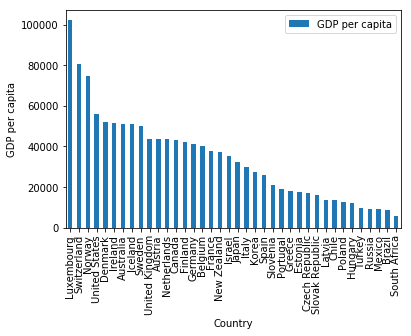

In [19]:
# +-+-+-+-+-+-+-+-+-+-+
# |K|N|e|i|g|h|b|o|r|s|
# +-+-+-+-+-+-+-+-+-+-+

# Visualize the data as a bar model to see the closest countries to Cyprus in terms of GDP per capita (see Spain, Slovenia and Portugal)
country_stats.filter(items=['GDP per capita']).sort_values("GDP per capita", ascending=False).plot.bar()
plt.xlabel('Country')
plt.ylabel('GDP per capita')
plt.show()


In [20]:
#X as an independent variable
X = np.c_[country_stats['GDP per capita']]
# y as a dependent variable - predictor
y = np.c_[country_stats['Life satisfaction']]

In [ ]:
# Select a KNeighbor model - Change the number of KNeighbors to take into account the 3 closest countries
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=0)
## Train the model
model.fit(X, y)

In [ ]:
#Make another prediction for Cyprus
X_new = [[0]] # Cyprus GDP per capita

print ("Cyprus' Life satisfaction based on a KNeighborsRegressor:",model.predict(X_new))